In [1]:
from rljax.algorithm import DQN
from rljax.trainer import Trainer
import numpy as np
import pandas as pd

from micro_price_trading.config import TWENTY_SECOND_DAY
from micro_price_trading import Preprocess, OptimalExecutionEnvironment

In [2]:
raw = Preprocess('TBT_TBF_data.csv', res_bin=6)
data = raw.process()

In [3]:
# 23,400 seconds between 9:30am and 4pm broken in 10 second increments

NUM_AGENT_STEPS = 10000
SEED = 0

env = OptimalExecutionEnvironment(
    data,
    risk_weights=(2, 1),
    trade_penalty=1.1,
    reward_func=lambda port, p: port.cash,
    steps=TWENTY_SECOND_DAY,
    end_units_risk=TWENTY_SECOND_DAY//5*2,
    seed=SEED
)
env_test = env.copy_env()

algo = DQN(
    num_agent_steps=NUM_AGENT_STEPS,
    state_space=env.observation_space,
    action_space=env.action_space,
    seed=SEED,
    batch_size=256,
    start_steps=1000,
    update_interval=1,
    update_interval_target=400,
    eps_decay_steps=0,
    loss_type="l2",
    lr=1e-4,
)

trainer = Trainer(
    env=env,
    env_test=env_test,
    algo=algo,
    log_dir="",
    num_agent_steps=NUM_AGENT_STEPS,
    eval_interval=2000,
    seed=SEED,
)
trainer.train()

Num steps: 2000     Return: -2941032685.2   Time: 0:00:43
Num steps: 4000     Return: -2941829078.9   Time: 0:01:37
Num steps: 6000     Return: -5062383578.8   Time: 0:02:29
Num steps: 8000     Return: -5054255970.8   Time: 0:03:23
Num steps: 10000    Return: -5062789941.9   Time: 0:04:19


In [4]:
env.end_units_risk

468

In [5]:
env_test.portfolio_history[-1][-10:]

/mnt/c/Users/cspa3/Desktop/Projects/CitiExecutionAlgo/micro_price_trading/history/optimal_execution_history.py:72: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(self._portfolios)


[Portfolio(time=1161, cash=-8579516.56, shares=(399, 521867), prices=(17.85500000000001, 16.415), total_risk=522665, res_imbalance_state='201', trade=Trade(asset=2, shares=450, risk=450, price=16.415, cost=7386.75, penalty=False), penalty_trade=None),
 Portfolio(time=1162, cash=-8586903.31, shares=(399, 522317), prices=(17.85500000000001, 16.415), total_risk=523115, res_imbalance_state='101', trade=Trade(asset=2, shares=450, risk=450, price=16.415, cost=7386.75, penalty=False), penalty_trade=None),
 Portfolio(time=1163, cash=-8594290.06, shares=(399, 522767), prices=(17.85500000000001, 16.415), total_risk=523565, res_imbalance_state='211', trade=Trade(asset=2, shares=450, risk=450, price=16.415, cost=7386.75, penalty=False), penalty_trade=None),
 Portfolio(time=1164, cash=-8601676.81, shares=(399, 523217), prices=(17.85500000000001, 16.415), total_risk=524015, res_imbalance_state='211', trade=Trade(asset=2, shares=450, risk=450, price=16.415, cost=7386.75, penalty=False), penalty_trade

AttributeError: 'OptimalExecutionEnvironment' object has no attribute '_portfolio_values_history'

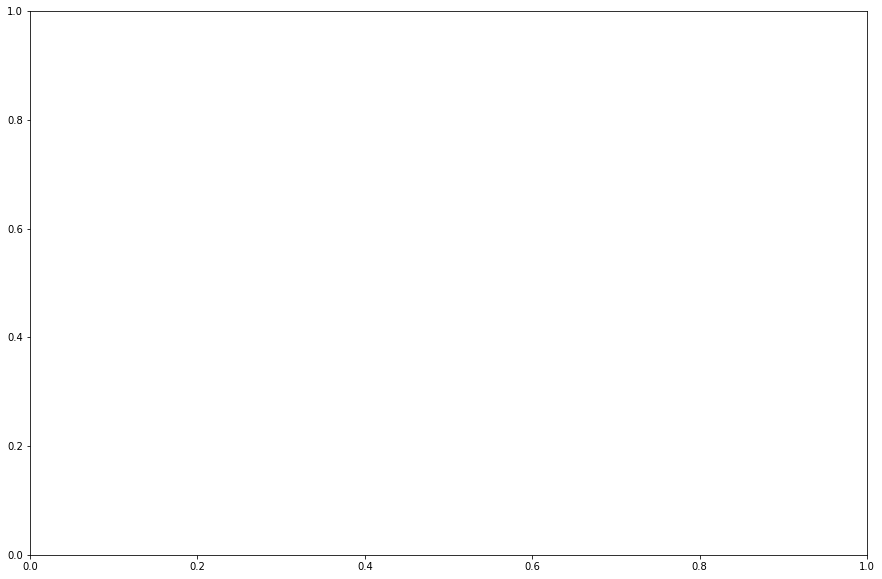

In [6]:
env.plot()

In [ ]:
env_test.plot()

In [ ]:
env_test.plot('position_history')

In [ ]:
env_test.plot('summarize_decisions')

In [ ]:
env.plot('learning_progress')